# **EDA FOR GREENLINE AUTOMOBILES**

**1. DATA PREPROCESSING**

-Dropped "Seats" and "Mileage" columns as they were of no use for this eda

-Null values - replaced the null values with average vaue for columns :"engine", "max power", "torque"

- changed data types of "max_power" "torque" and "engine"
 

**2. One hot encoding**



- Performed one hot encoding for "owner","fuel","seller type" and "transmission"
- 

 **3. Dataset Visualization**

 
a) Histogram  Distribution of numerical features (selling_price, km_driven, year, engine, max_power).
b) Correlation Heatmap 
c) Boxplot 
d) Bar Plot - (fuel type, seller_type, transmission).
e) Pairplot 
f) Scatter Plot – (km_driven and selling_price)

**4.Linear Regression**

- The combined dataset was split into training and test sets
- split it into 'max_power','year' vs 'Selling_price'
- outliers were removed from test and train sets.
- applied standard scaling
- trained the linear regression model
- Scatter plot for the model's predicted vs acutal value


 **4. Conclusion**

 a) Fuel - Diesel > Petrol > Lpg
 b) Transmission - Manual > automatic
 c) seller type - Individual > Dealer > Trustmark dealer
 d) majority cars being sold are driven less that 100k Kms
 e) Performance centric cars are  being sold in less numbers 
 

In [2]:

import numpy as np 
import pandas as pd

import os
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [3]:
fp = '/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv'

df = pd.read_csv(fp)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:

df.info

<bound method DataFrame.info of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission  

In [5]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
df.drop("seats", axis = 1,inplace = True)
df.drop("mileage", axis = 1,inplace = True)


In [7]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
engine           221
max_power        215
torque           222
dtype: int64

In [8]:
df.describe

<bound method NDFrame.describe of                               name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission

In [31]:
df.loc[:, 'engine'] = df['engine'].fillna(df['engine'].mode()[0])  
df.loc[:, 'max_power'] = df['max_power'].fillna(df['max_power'].mode()[0])  
df.loc[:, 'torque'] = df['torque'].fillna(df['torque'].mode()[0])  

In [32]:
df.isnull().sum()

name                            0
year                            0
selling_price                   0
km_driven                       0
owner                           0
engine                          0
max_power                       0
torque                          0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
fuel_type                       0
dtype: int64

In [11]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
engine           object
max_power        object
torque           object
dtype: object

In [12]:
df['max_power'] = df['max_power'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
df['torque'] = df['torque'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
df['engine'] = df['engine'].str.extract('(\d+\.?\d*)').astype(float)

In [13]:
le = LabelEncoder()
df['owner'] = le.fit_transform(df['owner'])
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission'], drop_first=True)

In [14]:
df['name'] = df['name'].astype(str)

print(df.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'owner', 'engine',
       'max_power', 'torque', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual'],
      dtype='object')


In [15]:
df.dtypes

name                             object
year                              int64
selling_price                     int64
km_driven                         int64
owner                             int64
engine                          float64
max_power                       float64
torque                          float64
fuel_Diesel                        bool
fuel_LPG                           bool
fuel_Petrol                        bool
seller_type_Individual             bool
seller_type_Trustmark Dealer       bool
transmission_Manual                bool
dtype: object

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

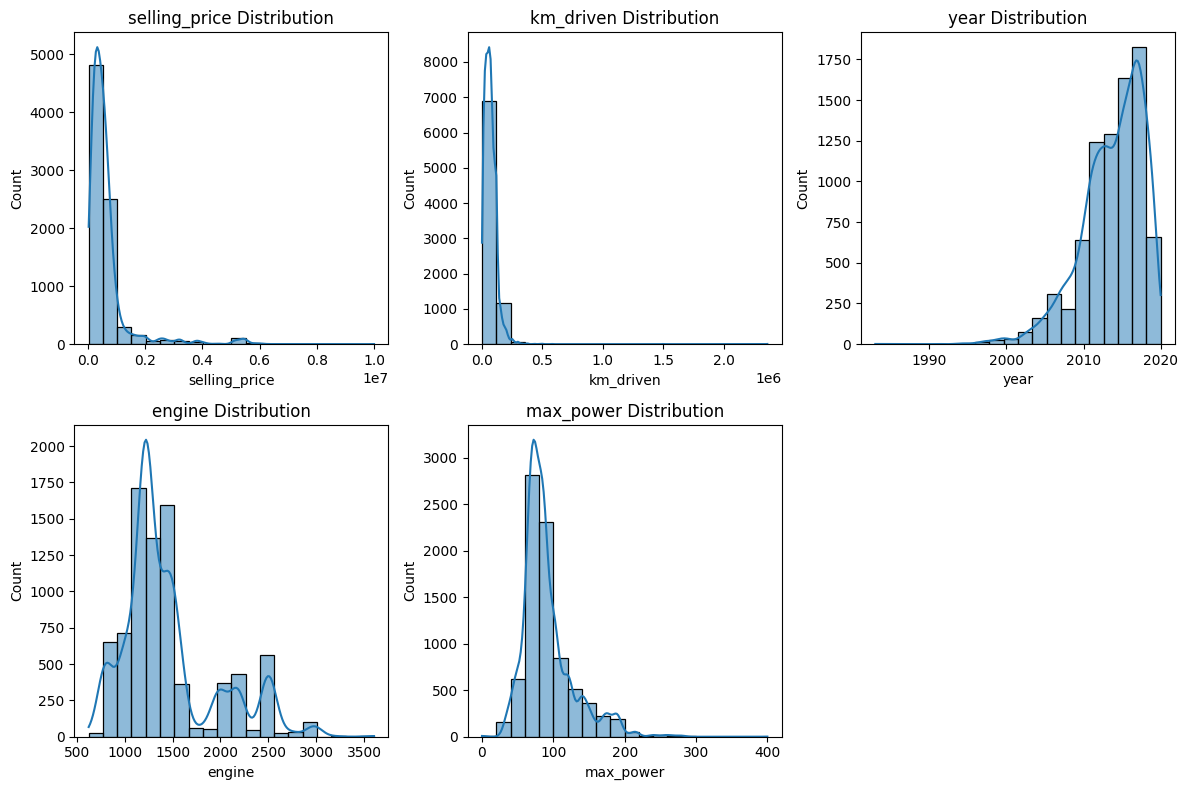

In [16]:
numeric_columns = ['selling_price', 'km_driven', 'year', 'engine', 'max_power']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


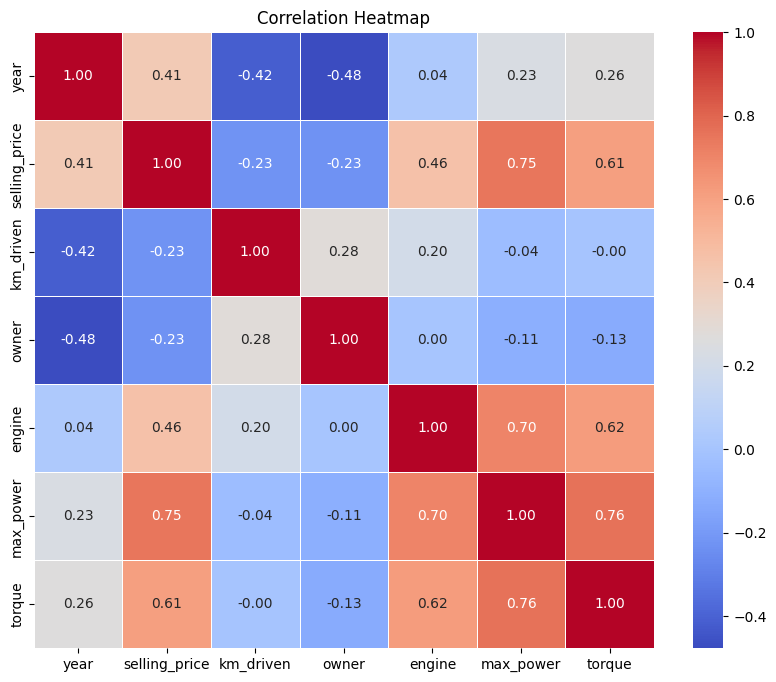

In [17]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

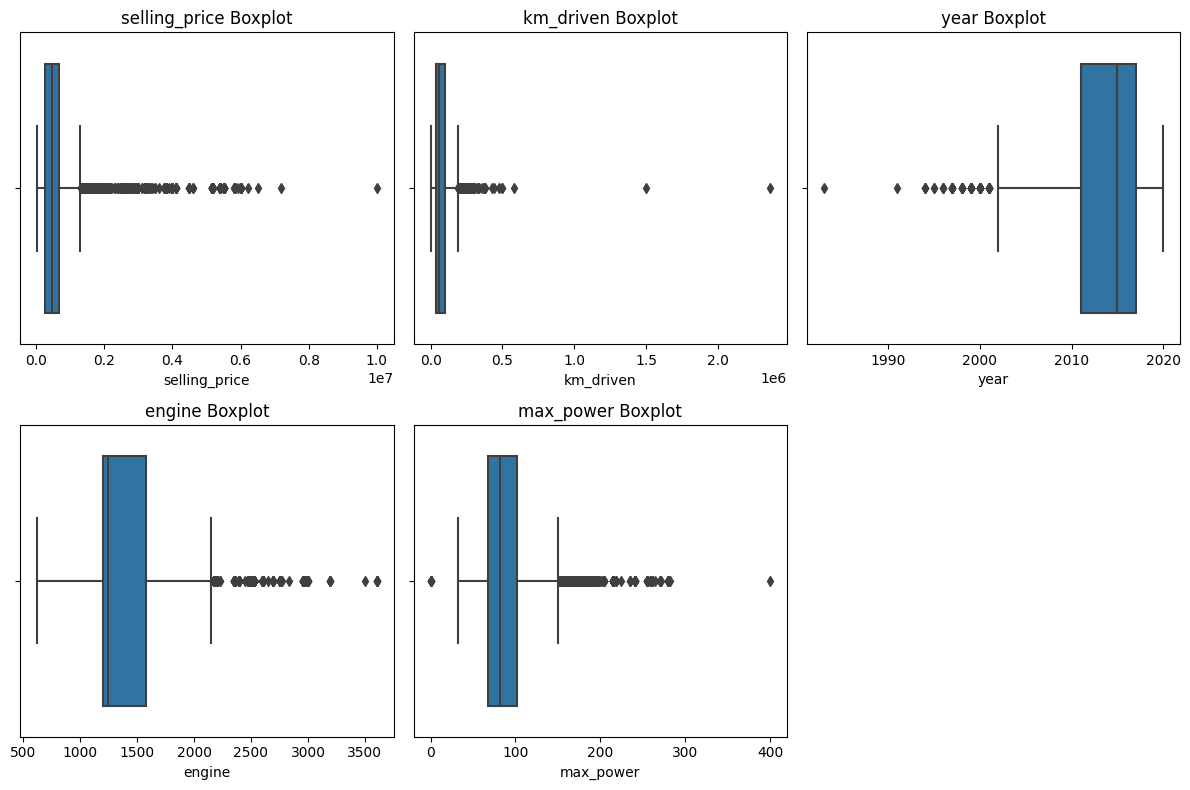

In [18]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'{col} Boxplot')
plt.tight_layout()
plt.show()

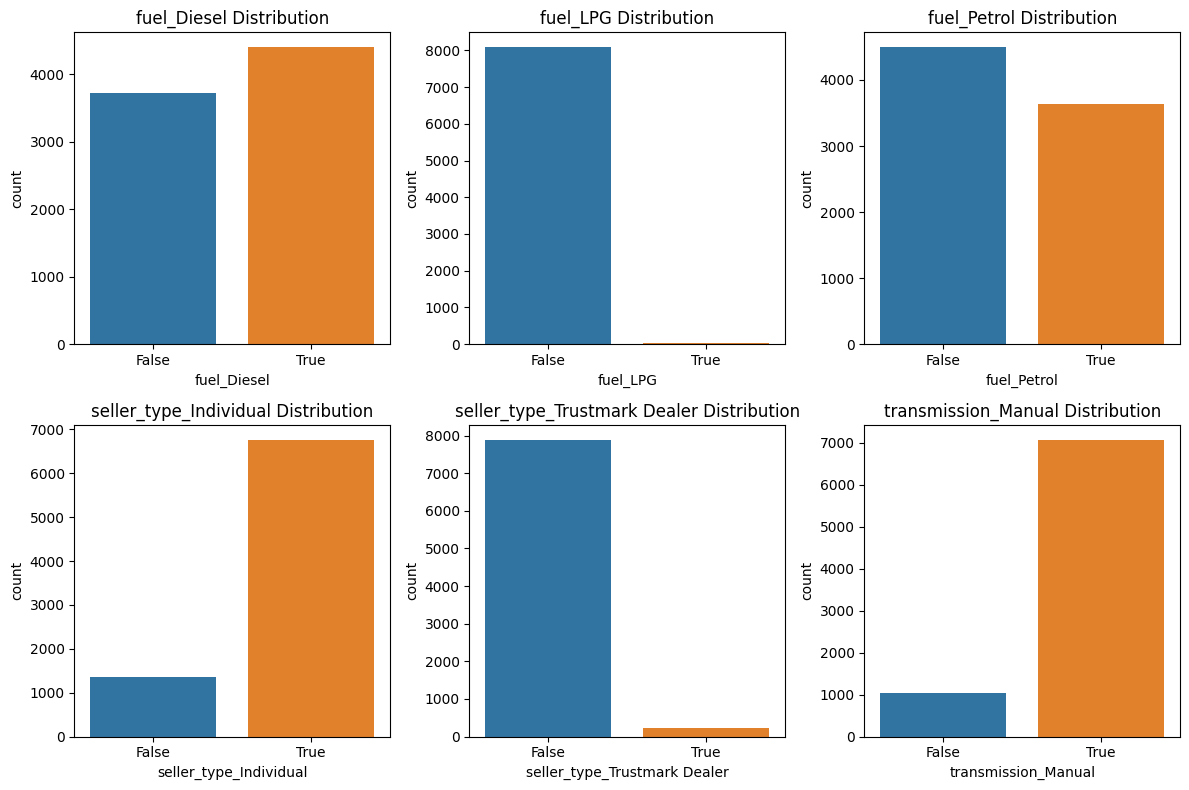

In [19]:
categorical_columns = ['fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual']
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

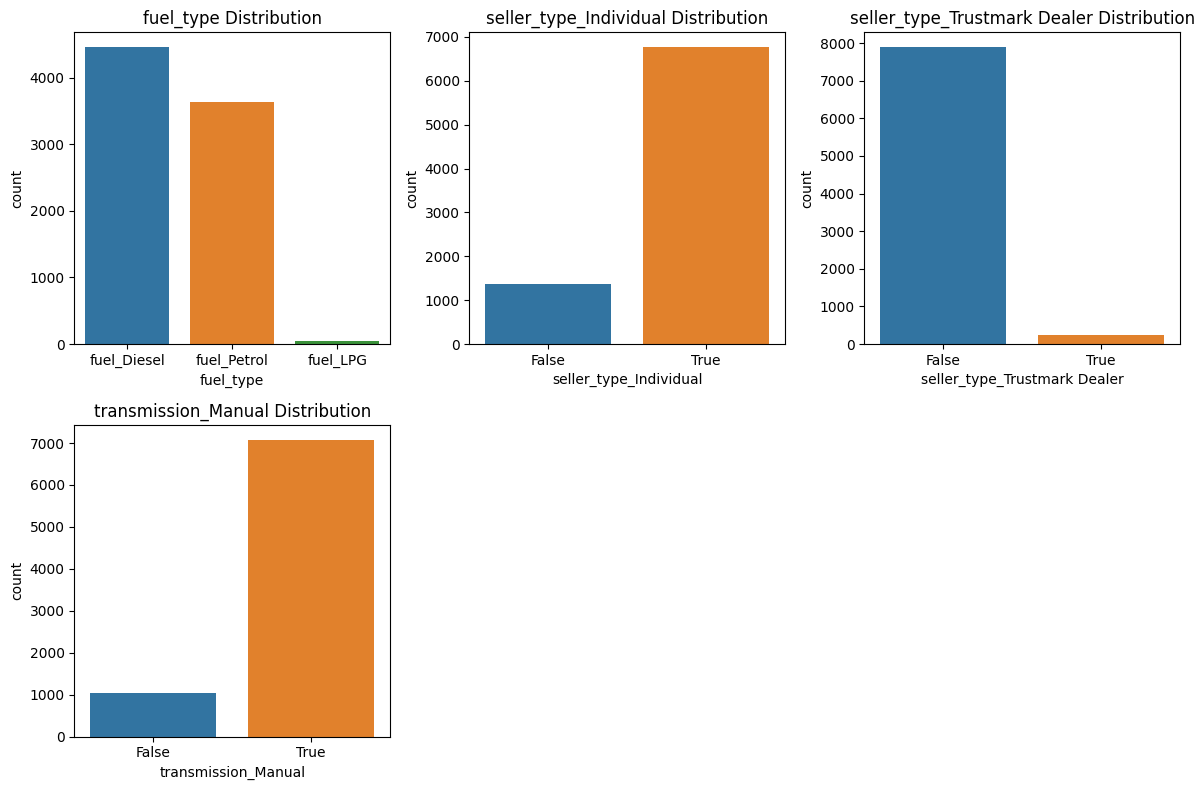

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
fuel_columns = ['fuel_Diesel', 'fuel_LPG', 'fuel_Petrol']
df['fuel_type'] = df[fuel_columns].idxmax(axis=1)
categorical_columns = ['fuel_type', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual']
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

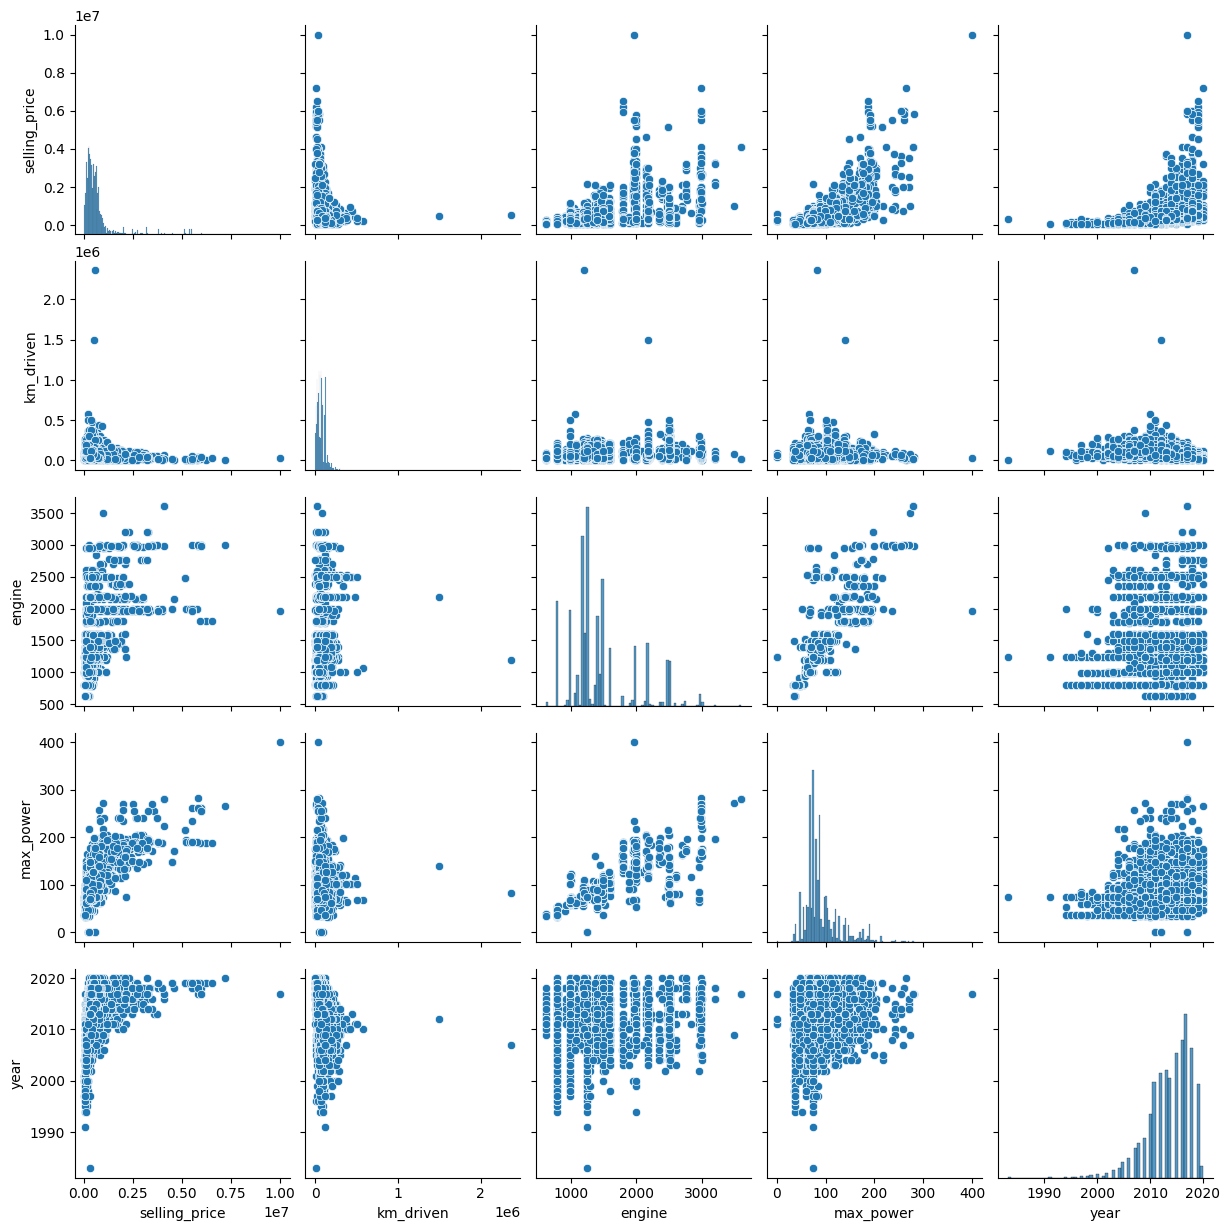

In [21]:
sns.pairplot(df[['selling_price', 'km_driven', 'engine', 'max_power', 'year']])
plt.show()

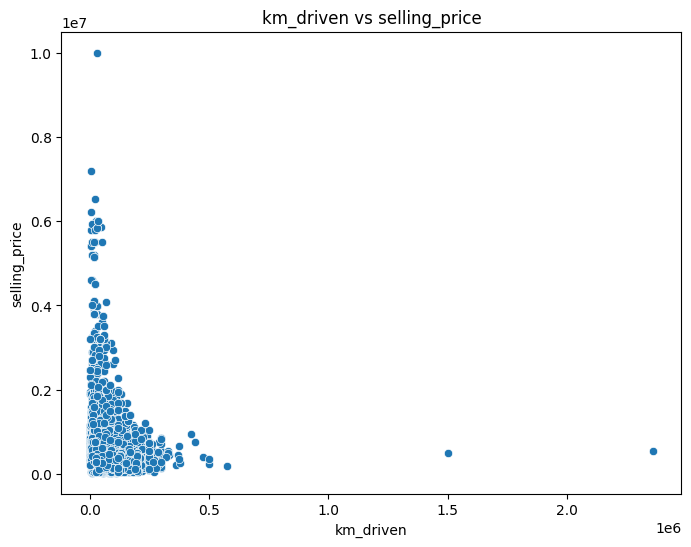

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['km_driven'], y=df['selling_price'])
plt.title('km_driven vs selling_price')
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show()

In [46]:

X = df[['max_power', 'year']]
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train_clean = X_train[~((X_train < lower_bound) | (X_train > upper_bound)).any(axis=1)]
y_train_clean = y_train.loc[X_train_clean.index] 
print(f"Original X_train size: {X_train.shape}")
print(f"Cleaned X_train size: {X_train_clean.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)  

lr = LinearRegression()
lr.fit(X_train_scaled, y_train_clean)

y_pred = lr.predict(X_test_scaled)

print(pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}).head(10))

Original X_train size: (6502, 2)
Cleaned X_train size: (5973, 2)
   Actual      Predicted
0  198000  149232.112222
1  500000  864430.839391
2  425000  505154.687971
3  150000  238947.155315
4  525000  371002.002877
5  160000  184155.604911
6  450000  468622.047071
7  570000  640006.392208
8  170000   87442.569385
9  135000 -125859.360377


In [48]:
X = df[['max_power', 'year']]
y = df['selling_price']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =  42 )

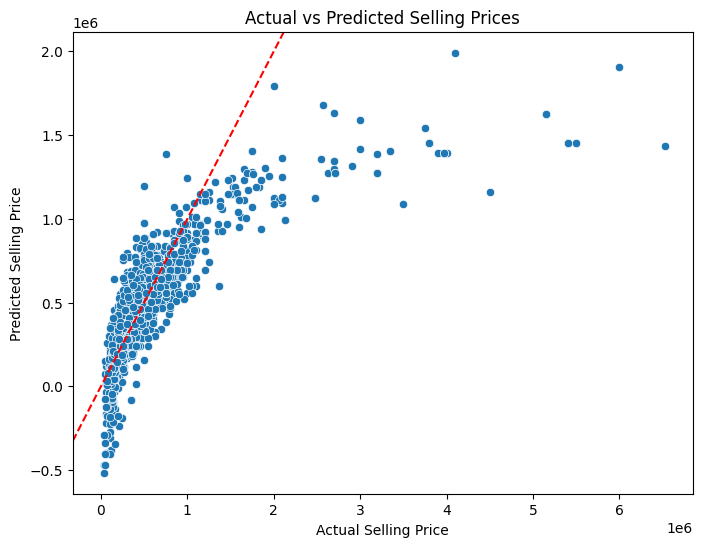

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Prices")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")
plt.show()
